# 1.10. Decision Trees
http://scikit-learn.org/stable/modules/tree.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. - - Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## 1.10.1. Classification
DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

After being fitted, the model can then be used to predict the class of samples:

In [3]:
clf.predict([[2., 2.]])

array([1])

Alternatively, the **probability of each class** can be predicted, which is the fraction of training samples of the same class in a leaf:

In [4]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

Using the Iris dataset, we can construct a tree as follows:

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

`conda install python-graphviz`

Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with pip install graphviz.

Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file iris.pdf:

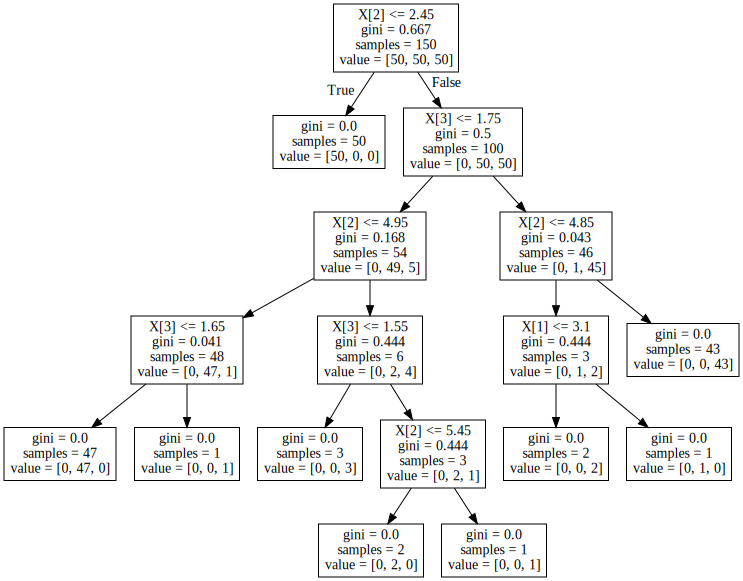

In [6]:
import graphviz 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("iris", view = True) 
graph

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

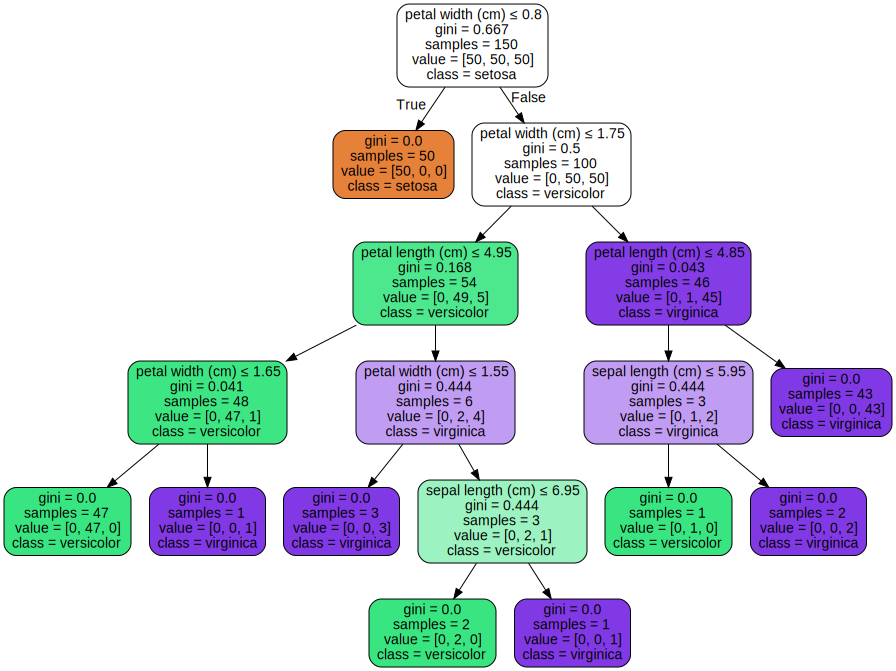

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

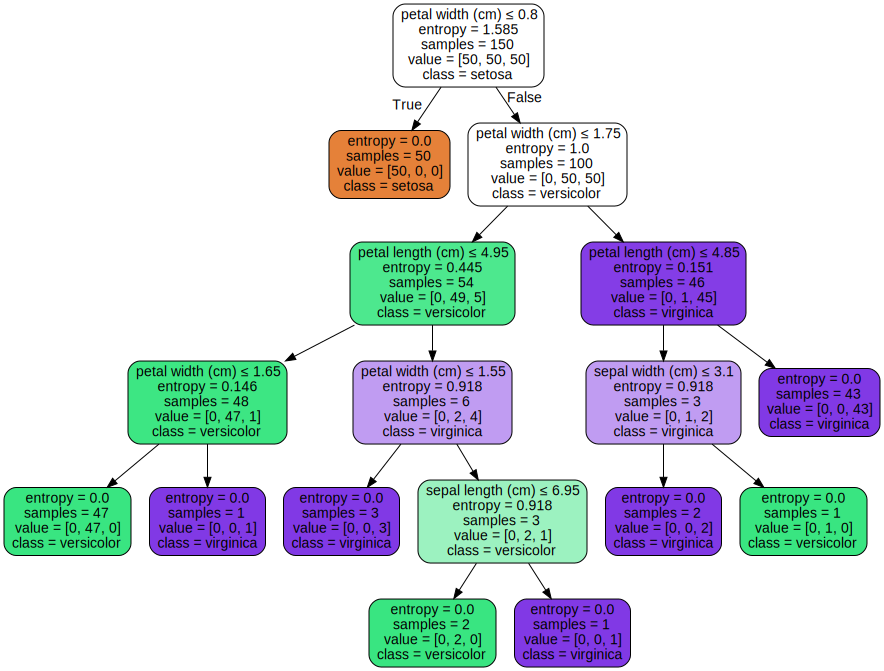

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

After being fitted, the model can then be used to predict the class of samples:

In [9]:
clf.predict(iris.data[:1, :])

array([0])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [10]:
iris.data[:1, :]

array([[ 5.1,  3.5,  1.4,  0.2]])

In [11]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

### Plot the decision surface of a decision tree on the iris dataset
Plot the decision surface of a decision tree trained on pairs of features of the iris dataset.

See decision tree for more information on the estimator.

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

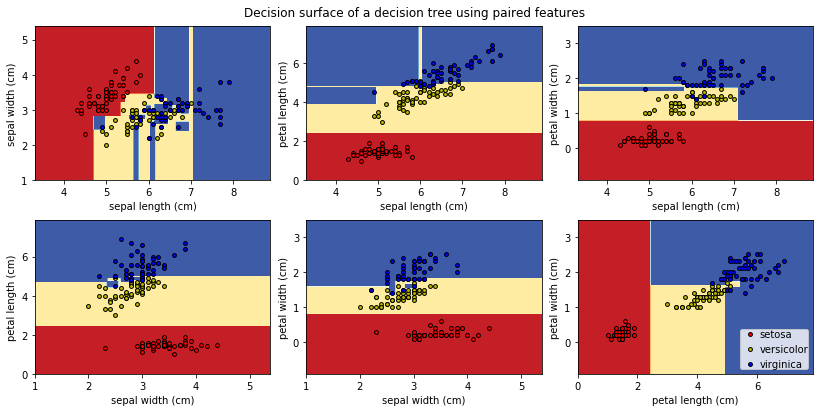

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.figure(figsize = (12, 6))

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)  # 訓練

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 1.10.2. Regression
Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

In [13]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

### Decision Tree Regression
A 1D regression with decision tree.

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.



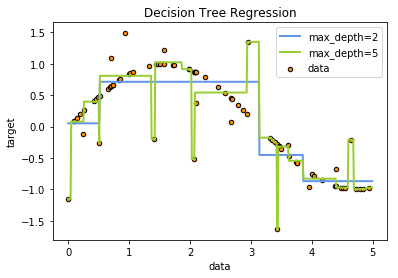

In [14]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model ******************
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict *******************************
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()

plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")

plt.plot(X_test, y_1, 
         color="cornflowerblue", linewidth=2,
         label="max_depth=2")

plt.plot(X_test, y_2, 
         color="yellowgreen", linewidth=2, 
         label="max_depth=5")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [39]:
# dot_data = tree.export_graphviz(regr_2, out_file=None,)
# graph = graphviz.Source(dot_data)  
# graph 

## 1.10.3. Multi-output problems
A multi-output problem is a supervised learning problem with several outputs to predict, that is when Y is a 2d array of size [n_samples, n_outputs].

When there is no correlation between the outputs, a very simple way to solve this kind of problem is to **build n independent models, i.e. one for each output**, and then to use those models to independently predict each one of the n outputs. However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to **build a single model capable of predicting simultaneously all n outputs**. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

- Store n output values in leaves, instead of 1;
- Use splitting criteria that compute the average reduction across all n outputs.
This module offers support for multi-output problems by implementing this strategy in both DecisionTreeClassifier and DecisionTreeRegressor. If a decision tree is fit on an output array Y of size [n_samples, n_outputs] then the resulting estimator will:

- Output n_output values upon predict;
- Output a list of n_output arrays of class probabilities upon predict_proba.

The use of multi-output trees for **regression** is demonstrated in Multi-output Decision Tree Regression. In this example, the input X is a single real value and the outputs Y are the sine and cosine of X.
 
The use of multi-output trees for **classification** is demonstrated in Face completion with a multi-output estimators. In this example, the inputs X are the pixels of the upper half of faces and the outputs Y are the pixels of the lower half of those faces.

### Multi-output Decision Tree Regression
An example to illustrate multi-output regression with decision tree.

The decision trees is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. As a result, it learns local linear regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

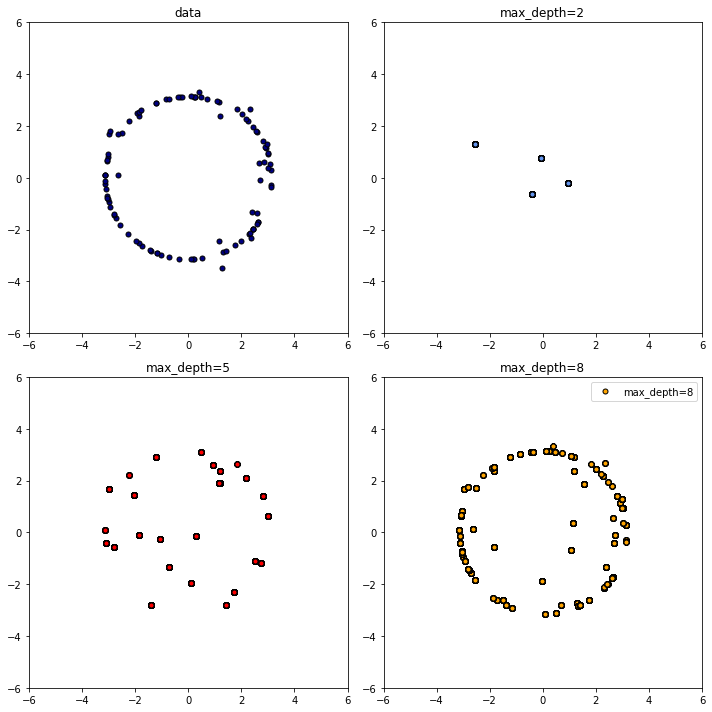

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# ***************************************************
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# ***************************************************

# Plot the results
fig = plt.figure(figsize = (10, 10))
s = 50
s = 25

plt.subplot(221)
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.title('data')
plt.xlim([-6, 6])
plt.ylim([-6, 6])

plt.subplot(222)
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.title('max_depth=2')
plt.xlim([-6, 6])
plt.ylim([-6, 6])

plt.subplot(223)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.title('max_depth=5')
plt.xlim([-6, 6])
plt.ylim([-6, 6])

plt.subplot(224)
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.title('max_depth=8')
plt.xlim([-6, 6])
plt.ylim([-6, 6])
 
# plt.xlabel("target 1")
# plt.ylabel("target 2")
# plt.title("Multi-output Decision Tree Regression")
# fig.title = ''
fig.tight_layout()
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [38]:
# dot_data = tree.export_graphviz(regr_3, out_file=None,)
# graph = graphviz.Source(dot_data)  
# graph 

### Face completion with a multi-output estimators
This example shows the use of multi-output estimator to complete images. The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The next columns illustrate how extremely randomized trees, k nearest neighbors, linear regression and ridge regression complete the lower half of those faces.

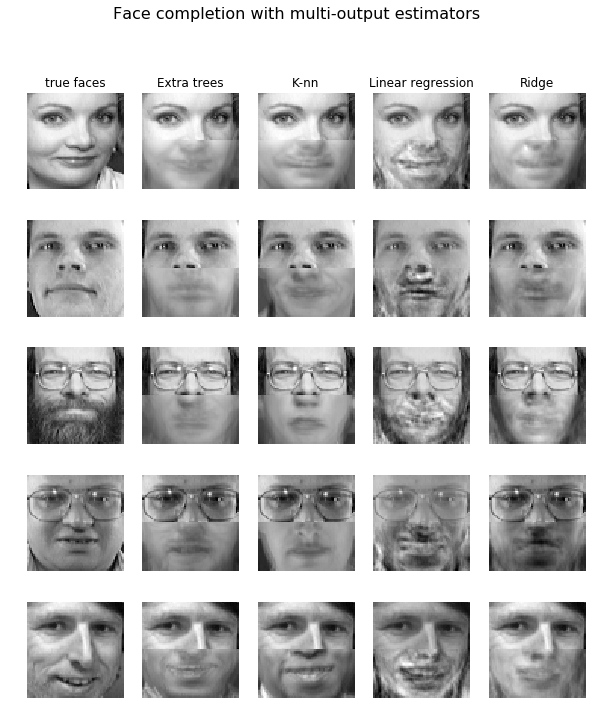

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()

# ***************************************************
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
# ***************************************************

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

## 1.10.4. Complexity
In general, the run time cost to construct a balanced binary tree is $O(n_{samples}n_{features}\log(n_{samples}))$ and query time $O(\log(n_{samples}))$. Although the tree construction algorithm attempts to generate balanced trees, they will not always be balanced. Assuming that the subtrees remain approximately balanced, the cost at each node consists of searching through $O(n_{features})$ to find the feature that offers the largest reduction in entropy. This has a cost of $O(n_{features}n_{samples}\log(n_{samples}))$ at each node, leading to a total cost over the entire trees (by summing the cost at each node) of $O(n_{features}n_{samples}^{2}\log(n_{samples}))$.

Scikit-learn offers a more efficient implementation for the construction of decision trees. A naive implementation (as above) would recompute the class label histograms (for classification) or the means (for regression) at for each new split point along a given feature. Presorting the feature over all relevant samples, and retaining a running label count, will reduce the complexity at each node to $O(n_{features}\log(n_{samples}))$, which results in a total cost of $O(n_{features}n_{samples}\log(n_{samples}))$. This is an option for all tree based algorithms. By default it is turned on for gradient boosting, where in general it makes training faster, but turned off for all other algorithms as it tends to slow down training when training deep trees.

## 1.10.5. Tips on practical use
- Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
- Consider performing **dimensionality reduction (PCA, ICA, or Feature selection)** beforehand to give your tree a better chance of finding features that are discriminative.
- Visualise your tree as you are training by using the `export` function. Use `max_depth=3` as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.
- Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use `max_depth` to control the size of the tree to prevent overfitting.
- Use `min_samples_split` or `min_samples_leaf` to control the number of samples at a leaf node. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try `min_samples_leaf=5` as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. The main difference between the two is that `min_samples_lea`f guarantees a minimum number of samples in a leaf, while `min_samples_split` can create arbitrary small leaves, though `min_samples_split` is more common in the literature.
- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. **Class balancing** can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (`sample_weight`) for each class to the same value. Also note that weight-based pre-pruning criteria, such as `min_weight_fraction_leaf`, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like `min_samples_leaf`.
- If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as `min_weight_fraction_leaf`, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.
- All decision trees use `np.float32` arrays internally. ***If training data is not in this format, a copy of the dataset will be made***.
- If the input matrix X is very sparse, it is recommended to convert to sparse `csc_matrix` before calling fit and sparse `csr_matrix` before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.  

## 1.10.6. Tree algorithms: ID3, C4.5, C5.0 and CART
What are all the various decision tree algorithms and how do they differ from each other? Which one is implemented in scikit-learn?

**ID3 (Iterative Dichotomiser 3)** was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

**C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. ***C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied***. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

**[CART (Classification and Regression Trees)](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29)** is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. ***CART constructs binary trees using the feature and threshold that yield the largest information gain at each node***.

**scikit-learn uses an optimised version of the CART algorithm**.

## 1.10.7. Mathematical formulation
Given training vectors $x_i \in R^n, i=1,…, l$ and a label vector $y \in R^l$, a decision tree recursively partitions the space such that the **samples with the same labels are grouped together**.

Let the data at node m be represented by Q. For each candidate split $\theta = (j, t_m)$ consisting of a feature j and threshold $t_m$, partition the data into $Q_{left}(\theta)$ and $Q_{right}(\theta)$ subsets

$Q_{left}(\theta) = {(x, y) | x_j <= t_m}$

$Q_{right}(\theta) = Q \setminus Q_{left}(\theta)$

The **impurity** at m is computed using an **impurity function H()**, the choice of which depends on the task being solved (classification or regression)

$G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta)) + \frac{n_{right}}{N_m} H(Q_{right}(\theta))$

Select the parameters that ***minimises the impurity***

$\theta^* = \operatorname{argmin}_\theta  G(Q, \theta)$

Recurse for subsets $Q_{left}(\theta^*)$ and $Q_{right}(\theta^*)$ ***until the maximum allowable depth is reached, $N_m < \min_{samples}$ or $N_m = 1$ ***.

### 1.10.7.1. Classification criteria
If a target is a classification outcome taking on values 0,1,…,K-1, for node m, representing a region  $R_m$ with $N_m$ observations, let

$p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k)$

be the proportion of class k observations in node m

Common measures of **impurity** are  

***Gini***

$H(X_m) = \sum_k p_{mk} (1 - p_{mk})$

***Cross-Entropy***

$H(X_m) = - \sum_k p_{mk} \log(p_{mk})$

***Misclassification***

$H(X_m) = 1 - \max(p_{mk})$

where $X_m$ is the training data in node m

### 1.10.7.2. Regression criteria
If the target is a continuous value, then for node m, representing a region R_m with N_m observations, common criteria to minimise as for determining locations for future splits are Mean Squared Error, which minimizes the L2 error using mean values at terminal nodes, and Mean Absolute Error, which minimizes the L1 error using median values at terminal nodes.

**Mean Squared Error**:

$c_m = \frac{1}{N_m} \sum_{i \in N_m} y_i$

$H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} (y_i - c_m)^2$

**Mean Absolute Error**:

$\bar{y_m} = \frac{1}{N_m} \sum_{i \in N_m} y_i$

$H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} |y_i - \bar{y_m}|$

where $X_m$ is the training data in node m